In [1]:
%reload_ext autoreload
# for auto reloading modules without kernel restart

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
from dataclasses import dataclass       # C like structure
!python --version
print('pandas version: ' + pd.__version__)
print('numpy version: ' + np.__version__)

Python 3.9.7
pandas version: 1.4.1
numpy version: 1.21.2


In [3]:
# Plot related packages,%matplotlib notebook makes plots in jupyter interactive
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import time

In [4]:
# increase default window size for notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/tmp/ipykernel_10056/696421802.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
import sys, os
sys.path.append(os.path.join(sys.path[0], 'my_modules'))                # sys.path[0] is dir of the ipynb file
import custom_plot
import data_clean
import data_preprocess
import constants

imported custom_plot.py
data_clean imported
data_preprocess imported


In [3]:
# From google drive, this is for colab only
from google.colab import drive
drive.mount('/content/gdrive')  # mount google drive
print()

In [4]:
# Read content from mounted google drive, this is for colab only
df = pd.read_csv('/content/gdrive/MyDrive/thesis/Experiment/output_joined-Jan19.csv')  # open file with google drive path

In [6]:
import glob                             # finds all the pathnames matching specified pattern
path = r'csv' # path of all csv files
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    frame = data_clean.get_clean_data(df)
    li.append(frame)

frame = pd.concat(li, axis=0, ignore_index=True)

ValueError: No objects to concatenate

In [21]:
# only keep first timestamp on duplicate 
frame.drop_duplicates(subset=['timestamp'], keep='first')
# filtered_frame = frame.drop_duplicates()
# Look at first 5 rows
frame.head(5)

,timestamp,0.stringstatereq_bms01_bms,10.current_bms01,10.linkvoltage_bms01,10.stringstate_bms01,20.meansoc_bms01,20.stringvoltage_bms01,30.maxsoc_bms01,30.minsoc_bms01,40.dchgintresistance_bms01,...,7c0.moduletemperature23_bms01,7c0.moduletemperature24_bms01,7c0.moduletemperature25_bms01,7c0.moduletemperature26_bms01,7c0.moduletemperature27_bms01,7c0.moduletemperature28_bms01,7c0.moduletemperature29_bms01,7c0.moduletemperature30_bms01,7c0.moduletemperature31_bms01,7c0.moduletemperature32_bms01
0,2022-02-21 11:07:00+00:00,1.0,-1.4,396.22,1.0,98.6,393.56,NaN,NaN,1.2,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
1,2022-02-21 11:07:01+00:00,1.0,-1.4,396.22,1.0,98.6,393.60,98.65,98.26,1.2,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
2,2022-02-21 11:07:02+00:00,1.0,-1.4,396.24,1.0,98.6,393.60,98.65,98.26,1.2,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
3,2022-02-21 11:07:03+00:00,1.0,-1.4,396.28,1.0,98.6,393.64,98.65,98.26,1.2,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
4,2022-02-21 11:07:04+00:00,1.0,-1.4,396.30,1.0,98.6,393.64,98.65,98.26,1.2,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0


In [22]:
# Convert timestamp from python obj to datetime and sort
frame['timestamp'] = pd.to_datetime(frame['timestamp'], format='%Y-%m-%d %H:%M:%S')
frame = frame.sort_values(by="timestamp")

# set timestamp as index to access slicing by timestamp using loc, inplace=True for permanently. Good time series data
# frame.set_index('timestamp', inplace=True)


In [9]:
# Sort by index e.g. datetime
# frame.sort_index()

In [9]:
# Play with time series data now
df_jan = frame.loc['2022-01-18':'2022-01-19']  # print whole df in limited timeframe upto date
# df_filtered_by_user.loc['2022-01-18 10':'2022-01-18 20']['740.minsoc_bms01']  # print min SOC in this timeframe upto min
frame.loc['2022-01-18 10:02':'2022-01-18 20:02']['740.minsoc_bms01'].mean()
# df_filtered_by_user.loc['2022-01-18 10']['740.minsoc_bms01']  # print min SOC only for 2022-01-18 10:00
# pandas date doc: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

97.04338207964801

In [23]:
# test max values of SOC
print(frame['740.minsoc_bms01'].max())     # 99.87, seems plausible
print(frame['7c0.brickvoltage002_bms01'].max())         # 4.148
frame.index.max()                          # returns the max timestamp
frame.index.max() - frame.index.min()
type(frame['30.minsoc_bms01'])
print(frame['30.minsoc_bms01'].dtype)
print(type(frame.index))
print(frame.index.dtype)

100.0
4.1508
float64
<class 'pandas.core.indexes.range.RangeIndex'>
int64


In [24]:
# split df based on date
df_feb = frame.loc[(frame['timestamp'] >= '2022-02-22') & (frame['timestamp'] <= '2022-02-24')]
print(df_feb['timestamp'].duplicated().sum())   # print num of duplicates if any
# print(df_feb)


0


In [25]:
df_feb = pd.read_pickle("feb.pkl")
print(df_feb['10.stringstate_bms01'].isnull().sum())   # print #Nan values
print(df_feb['7c0.brickvoltage015_bms01'].isnull().sum())   # print #Nan values

df_feb.dropna()
print(df_feb.shape[0])

0
1
152731


In [41]:
cwd = sys.path[0]
dir_path = os.path.join(cwd, 'csv')
src_path = os.path.join(dir_path, 'feb.pkl')

df_feb.to_pickle(src_path)

In [26]:
# preprocessing
df_feb = data_preprocess.interpolate_beyond_limit(df_feb, '7c0.brickvoltage015_bms01', constants.VOLTAGE_LOWER_LIMIT, constants.VOLTAGE_UPPER_LIMIT)

In [27]:

def split_on_time_gap(df, col, gap):
    # If diff between consecutive rows <= gap, then adds 0 (false) so cumsum remains same
    df['time_group'] = (abs(df_feb[col].diff().dt.total_seconds()) > gap).astype('int64').cumsum()
    print(df['time_group'].max())

In [28]:
TIME_GAP_TH_SEC = 10
split_on_time_gap(df_feb, 'timestamp', TIME_GAP_TH_SEC)

3


<IPython.core.display.Javascript object>


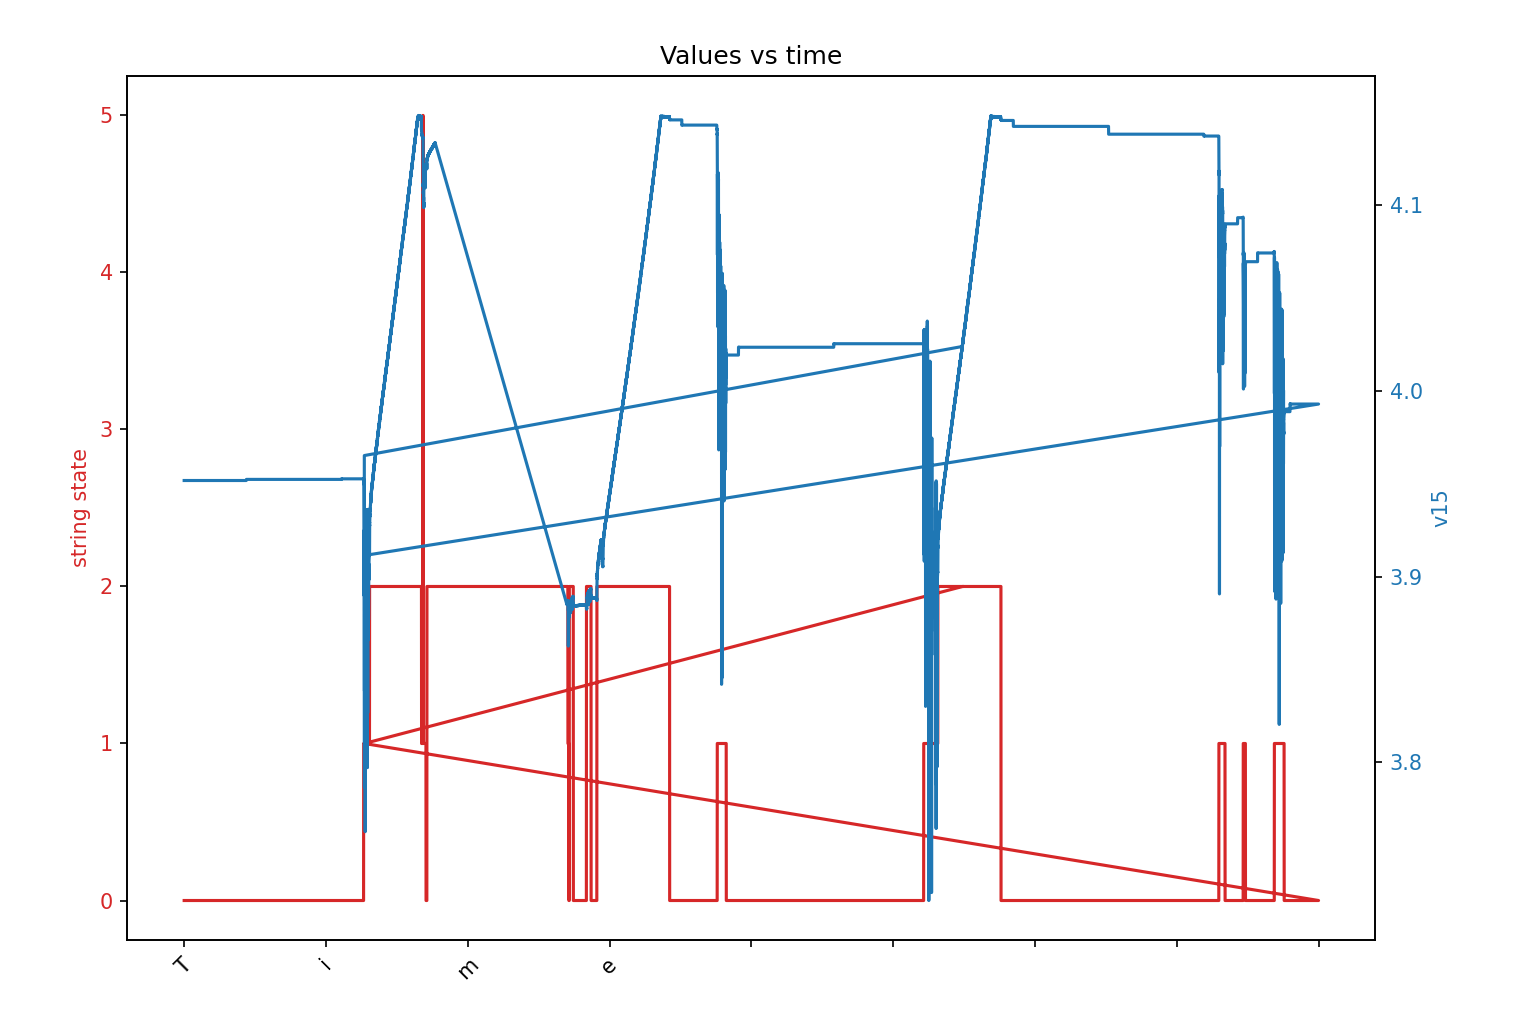

C:\Users\s.kaiser\Experiments\MuleCarData\my_modules\custom_plot.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  # ax1.set_xticklabels(x_label, rotation=45)


In [29]:
# %%timeit -r 2 -n 5  # repeat the plot() function twice, 5 loops. %%timeit must be the first thing in cell for jupyter to work
# exec time colab vs jupyter for 1000 rows
# df1 = df#[0:100]
# df1.plot(x='TimeStamp', y=['30.minSOC_BMS01', '740.minSOC_BMS01' ])
# %timeit -r 1 -n 1 plot()  # repeat once, run once the plot() function

# Params should be passed as (x_data, x_label), (y1_data, y1_label), (y2_data, y2_label), ... etc.

# df_jan = frame.sort_index().loc['2022-01-15' : '2022-01-19']           # must sort_index() before access by loc

# custom_plot.plot_dual_axis((df_jan.index, "Time"), (df_jan['7c0.brickvoltage001_bms01'], "V"), (df_jan['10.current_bms01'], "Current"))
# custom_plot.plot_dual_axis((df_jan.index, "Time"), (df_jan['7c0.brickvoltage001_bms01'], "V"), (df_jan['40.minsoh_bms01'], "SOH"))

# df_feb = frame.sort_index().loc['2022-02-22' : '2022-02-24']


# custom_plot.plot_dual_axis((df_feb.index, "Time"), (df_feb['7c0.brickvoltage002_bms01'], "V"), (df_feb['740.minsoc_bms01'], "SOC"))


custom_plot.plot_dual_axis((df_feb['timestamp'], "Time"), (df_feb['10.stringstate_bms01'], "string state"), (df_feb['7c0.brickvoltage015_bms01'], "v15"))

# custom_plot.plot_dual((df_feb['timestamp'], "Time"), (df_feb['10.stringstate_bms01'], "string state"), (df_feb['6c0.contactorstate_bms01'], "cntr state"))


#custom_plot.plot_dual_axis((df_feb.index, "Time"), (df_feb['10.current_bms01'], "I"), (df_feb['7c0.brickvoltage015_bms01'], "v15"))
#custom_plot.plot_dual_axis((df_feb.index, "Time"), (df_feb['10.current_bms01'], "I"), (df_feb['7c0.brickvoltage002_bms01'], "v2"))

# custom_plot.plot_xy((df_feb.index, "Time"), (df_feb['40.minsoh_bms01'], "SOH"))
# custom_plot.plot_dual_axis((df_feb.index, "Time"), (df_feb['6c0.contactorstate_bms01'], "cntr stat"), (df_feb['740.ctrofftime_bms01'], "contactor off time"))
# google colab runtime type none: exec time: 5 loops, best of 2: 14.5 s per loop
# jupyter notebook: 9.65 s ± 89 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


In [33]:
def get_ts_records_by_timegap(df, col, gap):
    # If diff between consecutive rows <= gap, then adds 0 (false) so cumsum remains same
    df['time_group'] = (abs(df[col].diff().dt.total_seconds()) > gap).astype('int64').cumsum()
    gb = df.groupby('time_group')
    return tuple(gb.get_group(x) for x in gb.groups)    # use tuples, not list as list of df is mutable even when copied

In [34]:
tu_time_divided_ts = get_ts_records_by_timegap(df_feb, 'timestamp', 1) # rets tuple of dfs
print(len(tu_time_divided_ts))

4


In [35]:
df_feb0 = tu_time_divided_ts[0]
df_feb1 = tu_time_divided_ts[1]
df_feb2 = tu_time_divided_ts[2]
df_feb3 = tu_time_divided_ts[3]

<IPython.core.display.Javascript object>


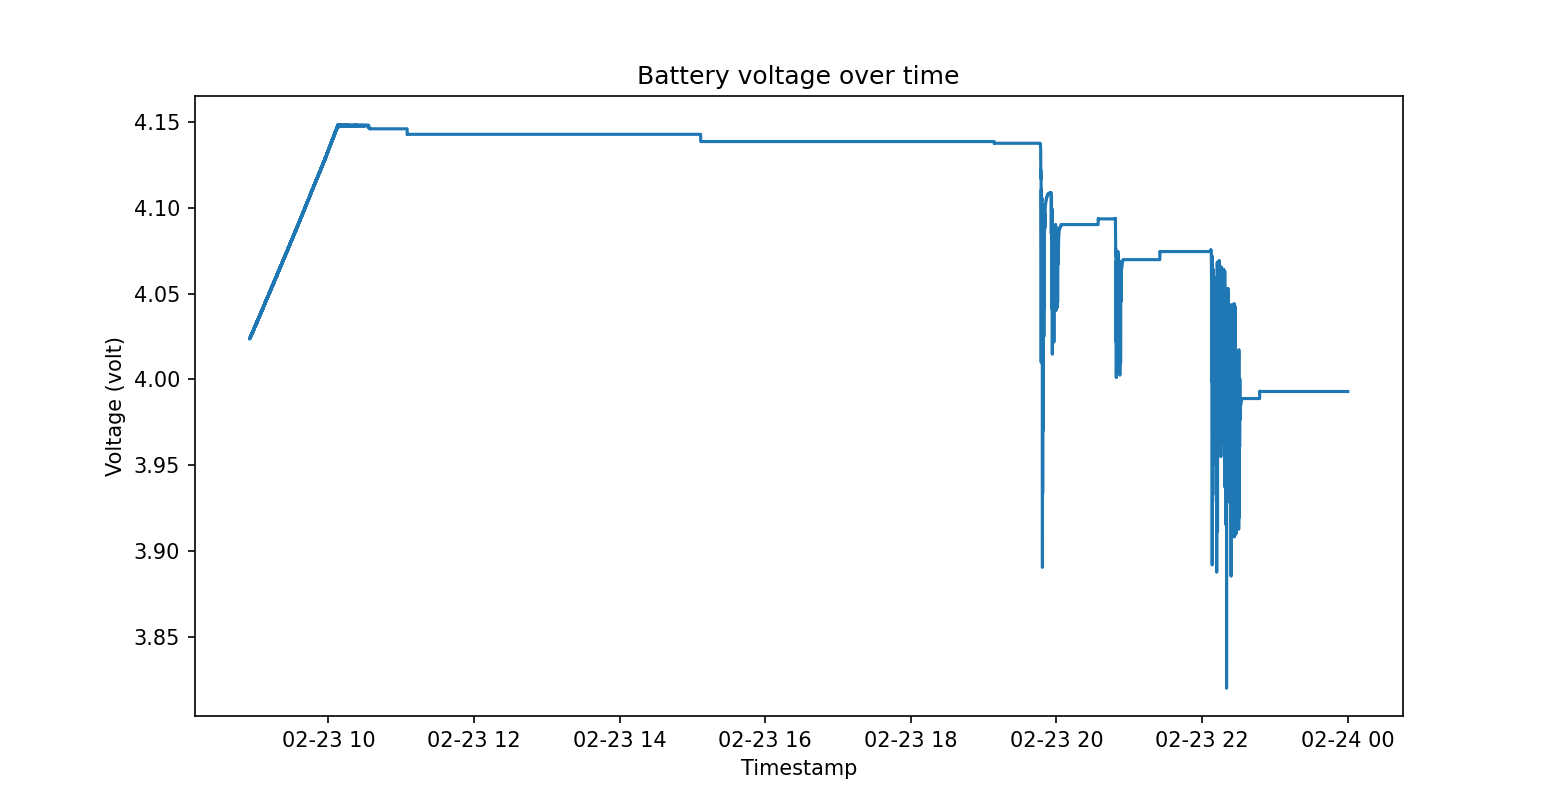

In [40]:
%matplotlib notebook
# plot entire df
# plot_xy((df['elapsed_sec'], "Time (s)"), (df['V1'], "V1"))
# df_plot.set_index('timestamp', inplace=True)
plt.plot(df_feb1["timestamp"], df_feb1['7c0.brickvoltage015_bms01'])
#     plt.scatter(df_plot.index, df_plot['V1'])

plt.title("Battery voltage over time") # set the whole plot name
plt.xlabel('Timestamp')
plt.ylabel('Voltage (volt)')
plt.show()

In [63]:
from datetime import datetime, timedelta
# Drive cycle detection
# Idea:
# step 1: voltage constant for >= 1 hour (v1, i1, SOC1, temp1, SOH1)
# step 2: voltage monotonically non decreasing
# step 3: voltage again constant for >= 1 hour (v2, i2, SOC2, temp2, SOH2)
# The above is one drive cycle
# All the start and end values become inputs and outputs for the ML algo
# Inputs: voltage, SOC, temperature, current. Output: SOH

# time_cur = df_filtered_by_user.index

# const
CONTACTOR_STATE_OFF = 0
CONTACTOR_STATE_ON = 2
volt_max = frame['7c0.brickvoltage002_bms01'].max()

df_cntr_on = df_feb[df_feb['6c0.contactorstate_bms01'] == CONTACTOR_STATE_ON]

# print(type(df_cntr_on.index))                # pandas.core.indexes.datetimes.DatetimeIndex
# Take the diff of the first column (drop 1st row since it's undefined)
# deltas = df_feb.index.diff()[1:]

#get mask where difference > 1 sec
# mask = df_feb.index.to_series().diff() > pd.Timedelta('00:10:01')

# Take the diff of the first column (drop 1st row since it's undefined)
deltas = df_feb.index.to_series().diff()[1:]

# Filter diffs > 1 sec
gaps = deltas[deltas > timedelta(seconds=2)]


# for i, g in gaps.iteritems():
#     print(i)         # row at which gap happens

# df_feb['6c0.contactorstate_bms01'] = CONTACTOR_STATE_ON

# custom_plot.plot_dual_axis((df_cntr_on.index, "Time"), (df_cntr_on['7c0.brickvoltage002_bms01'], "V"), (df_cntr_on['6c0.contactorstate_bms01'], "contactor state"))

df_cntr_on

,0.stringstatereq_bms01_bms,10.current_bms01,10.linkvoltage_bms01,10.stringstate_bms01,20.meansoc_bms01,20.stringvoltage_bms01,30.maxsoc_bms01,30.minsoc_bms01,40.dchgintresistance_bms01,40.maxsoh_bms01,...,7c0.moduletemperature23_bms01,7c0.moduletemperature24_bms01,7c0.moduletemperature25_bms01,7c0.moduletemperature26_bms01,7c0.moduletemperature27_bms01,7c0.moduletemperature28_bms01,7c0.moduletemperature29_bms01,7c0.moduletemperature30_bms01,7c0.moduletemperature31_bms01,7c0.moduletemperature32_bms01
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-22 07:35:30+00:00,1.0,-1.3,381.70,1.0,83.85,379.24,83.99,83.70,2.5,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
2022-02-22 07:35:31+00:00,1.0,-1.4,381.52,1.0,83.85,379.24,83.99,83.70,2.5,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
2022-02-22 07:35:32+00:00,1.0,-1.4,381.56,1.0,83.85,379.20,83.99,83.70,2.5,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
2022-02-22 07:35:33+00:00,1.0,-1.4,381.64,1.0,83.85,379.20,83.99,83.70,2.5,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
2022-02-22 07:35:34+00:00,1.0,-1.4,381.60,1.0,83.85,379.20,83.99,83.70,2.5,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24 07:59:10+00:00,2.0,8.2,379.50,2.0,78.70,376.68,78.89,78.53,2.2,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
2022-02-24 07:59:11+00:00,2.0,8.2,379.40,2.0,78.70,376.68,78.90,78.53,2.2,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
2022-02-24 07:59:12+00:00,2.0,8.2,379.42,2.0,78.71,376.68,78.90,78.53,2.2,100.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0


<IPython.core.display.Javascript object>


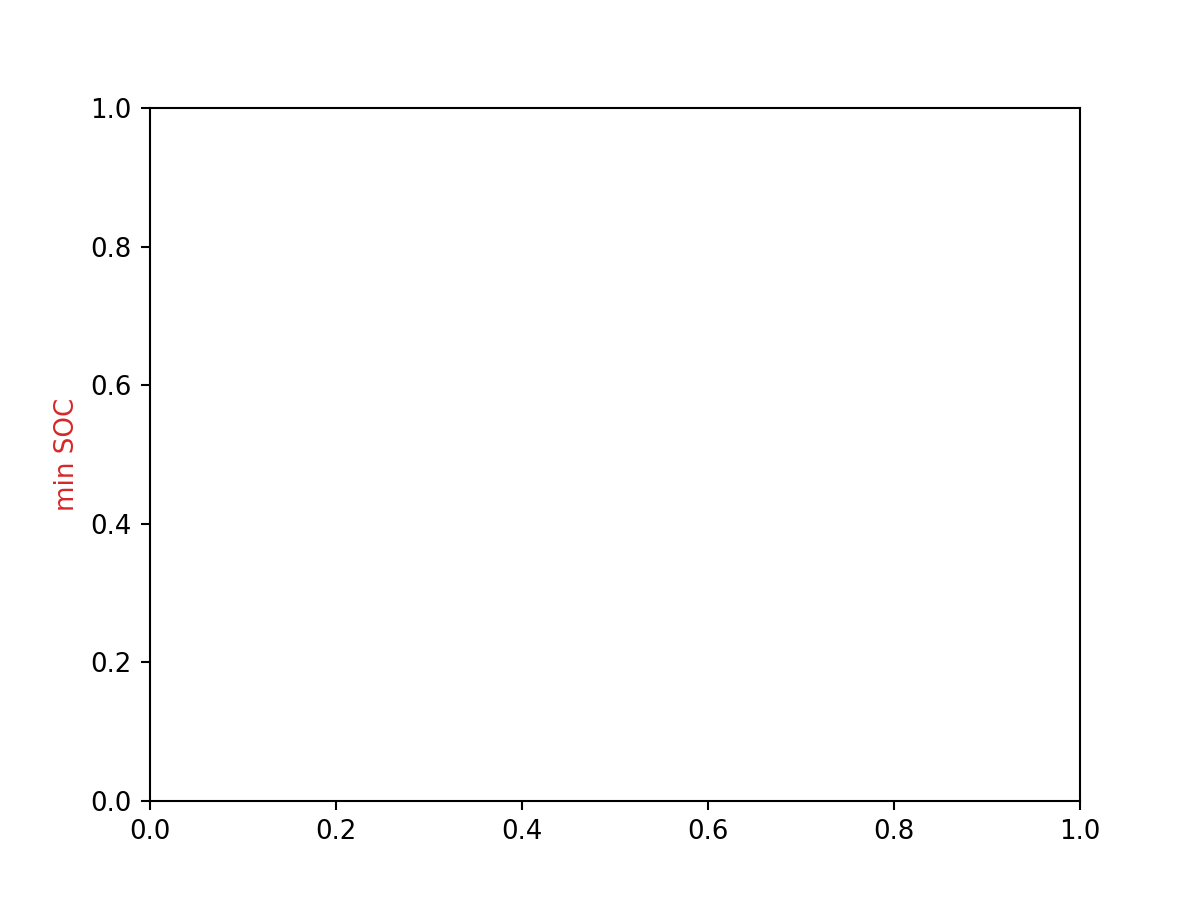

NameError: name 'df_1819' is not defined

In [13]:
def plot_single():
  # plt.plot(df_filtered_by_user['timestamp'], df_filtered_by_user['30.minsoc_bms01']) # not minSOC in %

  # Code for two different scale data in y axes, subplot is needed
  # ax1 has min SOC in y axis, red color
  color_red = 'tab:red'
  fig, ax1 = plt.subplots()             # subplots() rets fig, array of axes
  # plt.xticks(x, "Timestamp", rotation=45)
  # ax1.set_xlabel("Timestamp(s)")
  ax1.set_ylabel("min SOC", color=color_red)
  ax1.plot(df_1819.index, df_1819['740.minsoc_bms01'], color=color_red) # SOC values with color red
  ax1.tick_params(axis='y', labelcolor=color_red)  
  ax1.set_xticklabels("time", rotation=45)
  # Rotate the tick labels and set their alignment.
  # plt.setp(ax1.get_xticklabels(), rotation=45, rotation_mode="anchor")

  # ax2 has brick voltage in y axis, blue color
  color_green = 'tab:green'
  ax3 = ax1.twinx()  # twinx() makes ax2 same as ax1, so no need to explicitly set_xlabel again
  ax3.set_ylabel("740.ctrofftime_bms01", color=color_green)
  ax3.plot(df_1819.index, df_1819['740.ctrofftime_bms01'], color=color_green) # current color black
  ax3.tick_params(axis='y', labelcolor=color_green)

  # ax2 has brick voltage in y axis, blue color
  color_blue = 'tab:blue'
  ax3 = ax1.twinx()  # twinx() makes ax2 same as ax1, so no need to explicitly set_xlabel again
  ax3.set_ylabel("sococvinit_bms01", color=color_blue)
  ax3.plot(df_1819.index, df_1819['740.sococvinit_bms01'], color=color_blue) # current color black
  ax3.tick_params(axis='y', labelcolor=color_blue)

  plt.title("(min SOC, brick 1 voltage, Current)  vs time") # set the whole plot name

  # plt.legend(['740.minsoc_bms01'])
    
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  
  plt.show()
  # fig.canvas.get_supported_filetypes() # shows all supported file types
  fig.savefig('my_figure.eps')        # eps does not break on zoom

plot_single()



In [41]:
df.plot(x='TimeStamp', y=['740.sleeptime_bms01'])

KeyError: "None of [Index(['740.sleeptime_bms01'], dtype='object')] are in the [columns]"

In [ ]:
min(df['740.SOCocvInit_BMS01']), max(df['740.SOCocvInit_BMS01'])

(0.0, 1.0)

In [ ]:
df_changeName = df.rename(columns={'740.SOCocvInit_BMS01': 'SOCocvInit_BMS01', '740.minSOC_BMS01': 'minSOC_BMS01' })
PointsOfIntereset = df_changeName.SOCocvInit_BMS01[df_changeName.SOCocvInit_BMS01 == 1].index.tolist()

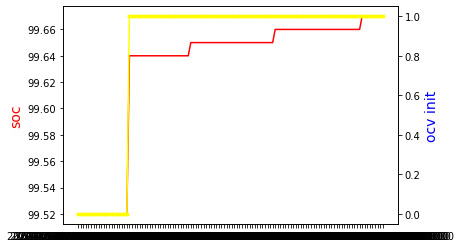

In [ ]:
df_changeName = df.rename(columns={'740.SOCocvInit_BMS01': 'SOCocvInit_BMS01', '740.minSOC_BMS01': 'minSOC_BMS01' })
PointsOfIntereset = df_changeName.SOCocvInit_BMS01[df_changeName.SOCocvInit_BMS01 == 1].index.tolist()
df_changeName = df_changeName[219790:219910]
fig,ax = plt.subplots()
ax.plot(df_changeName.TimeStamp, df_changeName.minSOC_BMS01, color="red")
ax.set_ylabel("soc",color="red",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_changeName.TimeStamp, df_changeName.SOCocvInit_BMS01,color="yellow", marker=".")
ax2.set_ylabel("ocv init",color="blue",fontsize=14)
plt.show()

In [ ]:
df[["20.meanSOC_BMS01", "40.minSOH_BMS01","3C0.dischargeCurrOpLkyBktThrs1_BMS01", '740.packVoltageCMB_BMS01']].describe()

,20.meanSOC_BMS01,40.minSOH_BMS01,3C0.dischargeCurrOpLkyBktThrs1_BMS01
count,295353.000000,295352.000000,295353.000000
mean,98.918927,99.872115,42.500576
std,2.194722,0.218147,0.221188
min,90.360000,99.500000,42.500000
25%,99.770000,99.500000,42.500000
50%,99.770000,100.000000,42.500000
75%,99.770000,100.000000,42.500000
max,655.350000,100.000000,127.500000


In [ ]:
df.TimeStamp[230300], df.TimeStamp[231800]

('2022-01-18 12:57:36+00:00', '2022-01-18 13:22:36+00:00')

In [ ]:
Columns = df.columns
Columns

Index(['TimeStamp', '0.isolationRequest_BMS01_BMS', '0.sleepRequest_BMS01_BMS',
       '0.stringStateReq_BMS01_BMS', '10.chargeState_BMS01',
       '10.current_BMS01', '10.faultBitHVIL_BMS01', '10.linkVoltage_BMS01',
       '10.stringState_BMS01', '10.thermalFaultIndex_BMS01',
       ...
       '7C0.moduleTemperature23_BMS01', '7C0.moduleTemperature24_BMS01',
       '7C0.moduleTemperature25_BMS01', '7C0.moduleTemperature26_BMS01',
       '7C0.moduleTemperature27_BMS01', '7C0.moduleTemperature28_BMS01',
       '7C0.moduleTemperature29_BMS01', '7C0.moduleTemperature30_BMS01',
       '7C0.moduleTemperature31_BMS01', '7C0.moduleTemperature32_BMS01'],
      dtype='object', length=1546)

In [ ]:
df.describe(include = 'all')

,TimeStamp,0.isolationRequest_BMS01_BMS,0.sleepRequest_BMS01_BMS,0.stringStateReq_BMS01_BMS,10.chargeState_BMS01,...,7C0.moduleTemperature28_BMS01,7C0.moduleTemperature29_BMS01,7C0.moduleTemperature30_BMS01,7C0.moduleTemperature31_BMS01,7C0.moduleTemperature32_BMS01
count,295353,295353.0,295353.0,295353.0,295353.0,...,295353.0,295353.0,295353.0,295353.0,295353.0
unique,295353,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75%,NaN,0.0,15.0,2.0,0.0,...,215.0,215.0,215.0,215.0,215.0
max,NaN,15.0,15.0,2.0,1.0,...,215.0,215.0,215.0,215.0,215.0


array([[<AxesSubplot:title={'center':'20.meanSOC_BMS01'}>]], dtype=object)

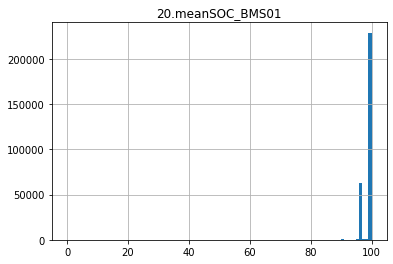

In [ ]:
df.hist(column='20.meanSOC_BMS01', bins=[0, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

array([[<AxesSubplot:title={'center':'40.minSOH_BMS01'}>]], dtype=object)

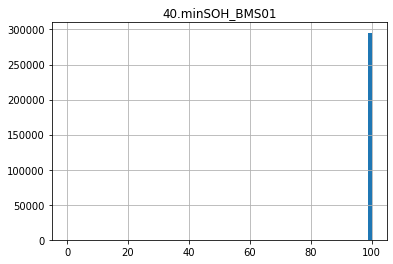

In [ ]:
df.hist(column='40.minSOH_BMS01', bins=[0, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])


In [ ]:
df['740.packVoltageCMB_BMS01'].describe()

count    295353.000000
mean        396.771827
std           2.585433
min         357.960000
25%         397.680000
50%         398.120000
75%         398.120000
max         398.160000
Name: 740.packVoltageCMB_BMS01, dtype: float64